<a href="https://colab.research.google.com/github/pacasarini/spark/blob/main/2_Dados_Abertos_Receita_Federal_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Configurando o Spark ##

In [ ]:
!ls
!rm -rf *
#Instacao e configuracao do Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Download do Apache Spark
!wget -q https://apache.osuosl.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop3.2.tgz
#Descompatacao do Apache Spark
!tar xf spark-3.2.4-bin-hadoop3.2.tgz
#Instalacao do Findspark
!pip install -q findspark

sample_data


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop3.2"

In [ ]:
!curl -L -o "/content/spark-3.2.4-bin-hadoop3.2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k  100  242k    0     0   795k      0 --:--:-- --:--:-- --:--:--  793k


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.7.0-spark2.4-s_2.11").getOrCreate()

In [ ]:
import pyspark
print(pyspark.__version__)

3.2.4


## Obtendo os dados para o estudo ( Receita Federal )

**Baixando as informações da Receita Federal - Empresas **

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas0.zip > Empresas0.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas1.zip > Empresas1.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas2.zip > Empresas2.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas3.zip > Empresas3.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas4.zip > Empresas4.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas5.zip > Empresas5.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas6.zip > Empresas6.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas7.zip > Empresas7.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas8.zip > Empresas8.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas9.zip > Empresas9.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  262M  100  262M    0     0  4199k      0  0:01:03  0:01:03 --:--:-- 3897k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74.1M  100 74.1M    0     0  3978k      0  0:00:19  0:00:19 --:--:-- 4524k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75.2M  100 75.2M    0     0  4168k      0  0:00:18  0:00:18 --:--:-- 4203k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 81.2M  100 81.2M    0     0  3848k      0  0:00:21  0:00:21 --:--:-- 4159k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!unzip Empresas0.zip
!unzip Empresas1.zip
!unzip Empresas2.zip
!unzip Empresas3.zip
!unzip Empresas4.zip
!unzip Empresas5.zip
!unzip Empresas6.zip
!unzip Empresas7.zip
!unzip Empresas8.zip
!unzip Empresas9.zip

Archive:  Empresas0.zip
  inflating: K3241.K03200Y0.D30708.EMPRECSV  
Archive:  Empresas1.zip
  inflating: K3241.K03200Y1.D30708.EMPRECSV  
Archive:  Empresas2.zip
  inflating: K3241.K03200Y2.D30708.EMPRECSV  
Archive:  Empresas3.zip
  inflating: K3241.K03200Y3.D30708.EMPRECSV  
Archive:  Empresas4.zip
  inflating: K3241.K03200Y4.D30708.EMPRECSV  
Archive:  Empresas5.zip
  inflating: K3241.K03200Y5.D30708.EMPRECSV  
Archive:  Empresas6.zip
  inflating: K3241.K03200Y6.D30708.EMPRECSV  
Archive:  Empresas7.zip
  inflating: K3241.K03200Y7.D30708.EMPRECSV  
Archive:  Empresas8.zip
  inflating: K3241.K03200Y8.D30708.EMPRECSV  
Archive:  Empresas9.zip
  inflating: K3241.K03200Y9.D30708.EMPRECSV  


In [ ]:
!mkdir empresas
!mv *CSV* empresas/

In [ ]:
!du -h empresas

4.0G	empresas


**Baixando as informações da Receita Federal - Socios **

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios0.zip > Socios0.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios1.zip > Socios1.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios2.zip > Socios2.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios3.zip > Socios3.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios4.zip > Socios4.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios5.zip > Socios5.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios6.zip > Socios6.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios7.zip > Socios7.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios8.zip > Socios8.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios9.zip > Socios9.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111M  100  111M    0     0  3464k      0  0:00:32  0:00:32 --:--:-- 3985k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47.0M  100 47.0M    0     0  2667k      0  0:00:18  0:00:18 --:--:-- 2824k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.9M  100 46.9M    0     0  2099k      0  0:00:22  0:00:22 --:--:-- 2026k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.8M  100 46.8M    0     0  2053k      0  0:00:23  0:00:23 --:--:-- 2397k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!unzip Socios0.zip
!unzip Socios1.zip
!unzip Socios2.zip
!unzip Socios3.zip
!unzip Socios4.zip
!unzip Socios5.zip
!unzip Socios6.zip
!unzip Socios7.zip
!unzip Socios8.zip
!unzip Socios9.zip

Archive:  Socios0.zip
  inflating: K3241.K03200Y0.D30708.SOCIOCSV  
Archive:  Socios1.zip
  inflating: K3241.K03200Y1.D30708.SOCIOCSV  
Archive:  Socios2.zip
  inflating: K3241.K03200Y2.D30708.SOCIOCSV  
Archive:  Socios3.zip
  inflating: K3241.K03200Y3.D30708.SOCIOCSV  
Archive:  Socios4.zip
  inflating: K3241.K03200Y4.D30708.SOCIOCSV  
Archive:  Socios5.zip
  inflating: K3241.K03200Y5.D30708.SOCIOCSV  
Archive:  Socios6.zip
  inflating: K3241.K03200Y6.D30708.SOCIOCSV  
Archive:  Socios7.zip
  inflating: K3241.K03200Y7.D30708.SOCIOCSV  
Archive:  Socios8.zip
  inflating: K3241.K03200Y8.D30708.SOCIOCSV  
Archive:  Socios9.zip
  inflating: K3241.K03200Y9.D30708.SOCIOCSV  


In [ ]:
!mkdir socios
!mv *CSV* socios/

## Obtendo os dados para o estudo ( CSV )

** Fazendo o upload dos dados de carteira comercial**

In [ ]:
from google.colab import files
empresas_carteira_comercial = files.upload()

Saving empresas_carteira_comercial.CSV to empresas_carteira_comercial (1).CSV


## Tratando e transformando os dados ###

### Empresas

In [ ]:
path = "/content/empresas/*"
df_empresas = spark.read.option("delimiter", ";").csv(path)
#df_empresas.printSchema()
#df_empresas.show()

In [ ]:
df_empresas_tratado = df_empresas.selectExpr("_c0 as CNPJ","_c1 as RAZAO_SOCIAL","_c2 as NATUREZA_JURIDICA","_c3 as QUALIFICACAO_RESPONSAVEL","_c4 as CAPITAL_SOCIAL","_c5 as PORTE_EMPRESA","_c6 as ENTE_FEDERATIVO")

In [ ]:
df_empresas_tratado.createOrReplaceTempView("empresas")
#sqlDF = spark.sql("select * from empresas where RAZAO_SOCIAL like '%IMPACTA%TECNOL%'")
#sqlDF.show()

### Socios

In [ ]:
path = "/content/socios/*"
df_socios = spark.read.option("delimiter", ";").csv(path)
#df_socios.printSchema()
#df_socios.show()

In [ ]:
df_socios_tratado = df_socios.selectExpr("_c0 as CNPJ","_c1 as IDENTIFICADOR_SOCIO","_c2 as SOCIO","_c3 as CPF_CNPJ","_c4 as QUALIFICACAO_SOCIO","_c5 as DATA_ENTRADA","_c6 as PAIS","_c7 as CPF_REPRESENTANTE_LEGAL","_c8 as QUALIFICACAO_REPRESENTANTE","_c9 as FAIXA_ETARIA_REPRESENTANTE")
df_socios_tratado.createOrReplaceTempView("socios")

### Carteira Comercial

In [ ]:
path = "empresas_carteira_comercial.CSV"
df_carteira_comercial = spark.read.option("delimiter", ";").csv(path)
df_carteira_comercial.printSchema()
df_carteira_comercial.show()

root
 |-- _c0: string (nullable = true)

+------------------+
|               _c0|
+------------------+
|              CNPJ|
|58.160.789/0001-28|
|47.508.411/0001-56|
|01.027.058/0001-91|
|01.181.521/0001-55|
|07.467.822/0001-26|
|12.420.164/0001-57|
|11.725.176/0001-27|
|54.517.628/0001-98|
|00.973.749/0001-15|
|12.648.327/0001-53|
|44.705.886/0001-44|
|49.669.856/0001-43|
|16.501.555/0001-57|
|07.332.190/0009-40|
|00.446.918/0018-07|
|12.272.084/0001-00|
|07.278.350/0001-63|
|01.771.935/0002-15|
|09.054.385/0001-44|
+------------------+
only showing top 20 rows



In [ ]:
df_carteira_comercial_tratado = df_carteira_comercial.selectExpr("substr(replace(_c0, '.', ''),0,8) as CNPJ")

In [ ]:
df_carteira_comercial_tratado.createOrReplaceTempView("clientes_carteira")

In [ ]:
#sqlDF = spark.sql("select empresas.* from empresas as empresas, clientes_carteira as clientes where  empresas.CNPJ=clientes.CNPJ")

## Salvando o arquivo com: Socios das empresas que fazem parte da carteira comercial

In [ ]:
df_clientes_empresas_socios = spark.sql("""select distinct empresas.*,
                                                  socios.IDENTIFICADOR_SOCIO,
                                                  socios.SOCIO,
                                                  socios.CPF_CNPJ,
                                                  socios.QUALIFICACAO_SOCIO,
                                                  socios.DATA_ENTRADA,
                                                  socios.PAIS,
                                                  socios.CPF_REPRESENTANTE_LEGAL,
                                                  socios.QUALIFICACAO_REPRESENTANTE,
                                                  socios.FAIXA_ETARIA_REPRESENTANTE
                                  from empresas as empresas,
                                       clientes_carteira as clientes,
                                       socios as socios
                                  where empresas.CNPJ=clientes.CNPJ
                                    and empresas.CNPJ=socios.CNPJ""")
#df_clientes_empresas_socios.show(20)

In [ ]:
df_clientes_empresas_socios.createOrReplaceTempView("socios_clientes")

In [ ]:
df_clientes_empresas_socios.coalesce(1).write.mode("overwrite").option("delimiter", ";").option("header", "true").csv("carteira_empresas_socios")

## Salvando o arquivo com: Empresas que tem os mesmos socios da carteira comercial

In [ ]:
df_empresas_socios = spark.sql("""select distinct empresas.*,socios.CPF_CNPJ
                                  from empresas as empresas,
                                       socios as socios
                                  where empresas.CNPJ=socios.CNPJ
                                    and empresas.CNPJ not in ( select CNPJ from clientes_carteira )
                                    and socios.CPF_CNPJ in (select CPF_CNPJ from socios_clientes) """)

In [ ]:
df_empresas_socios.coalesce(1).write.mode("overwrite").option("delimiter", ";").option("header", "true").csv("empresas_socios_carteira")

## Montando um grafo com o Spark GraphX

In [ ]:
!pip install graphframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
!curl -L -o "/usr/local/lib/python3.6/dist-packages/pyspark/jars/graphframes-0.8.0-spark2.4-s_2.11.jar" http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.8.0-spark2.4-s_2.11/graphframes-0.8.0-spark2.4-s_2.11.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164  100   164    0     0   1217      0 --:--:-- --:--:-- --:--:--  1223
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 
100   146  100   146    0     0    492      0 --:--:-- --:--:-- --:--:--  4562
curl: (23) Failure writing output to destination


In [ ]:
from graphframes import *

In [ ]:
empresas_graph = spark.sql("""select distinct empresas.CNPJ as src,socios.CPF_CNPJ as dst,"socio" as relationship,empresas.CAPITAL_SOCIAL
                                  from clientes_carteira clientes,
                                       empresas as empresas,
                                       socios as socios
                                  where clientes.CNPJ=socios.CNPJ
                                    and empresas.CNPJ=clientes.CNPJ
                                    and empresas.CNPJ is not null and socios.CPF_CNPJ is not null""")

In [ ]:
empresas = spark.sql("""select distinct empresas.CNPJ as id,socios.CPF_CNPJ as dst,"socio" as relationship,empresas.CAPITAL_SOCIAL
                                  from clientes_carteira clientes,
                                       empresas as empresas,
                                       socios as socios
                                  where clientes.CNPJ=socios.CNPJ
                                    and empresas.CNPJ=clientes.CNPJ
                                    and empresas.CNPJ is not null and socios.CPF_CNPJ is not null""")

In [ ]:
g = GraphFrame(empresas, empresas_graph)

In [ ]:
import networkx as nx

def plot_graph(es):
    g = nx.DiGraph()
    for row in es.select('src','dst').collect():
        g.add_edge(row['src'],row['dst'])

    nx.draw(g,  node_color='blue',node_size=30, font_size=10, font_color="yellow", font_weight="bold")

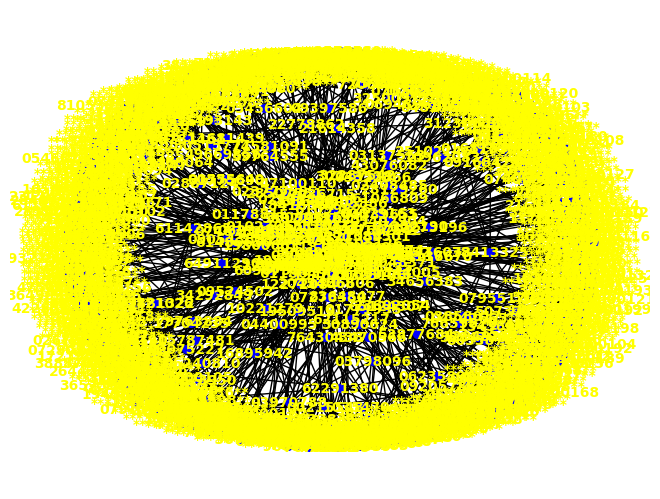

In [ ]:
plot_graph(g.edges)

In [ ]:
# the function will plot the source and destination nodes and connect them by meand of undirected line
def plot_directed_graph(edge_list):
    gplot=nx.DiGraph()
    edge_labels = {}
    for row in edge_list.select("src", "dst", "relationship").take(1000):
        gplot.add_edge(row["src"], row["dst"])
        edge_labels[(row["src"], row["dst"])] = row["relationship"]
    pos = nx.spring_layout(gplot)
    nx.draw(gplot, pos, with_labels=True, font_weight="bold", node_size=10)
    nx.draw_networkx_edge_labels(gplot, pos, edge_labels=edge_labels, font_color="green", font_size=11, font_weight="bold")

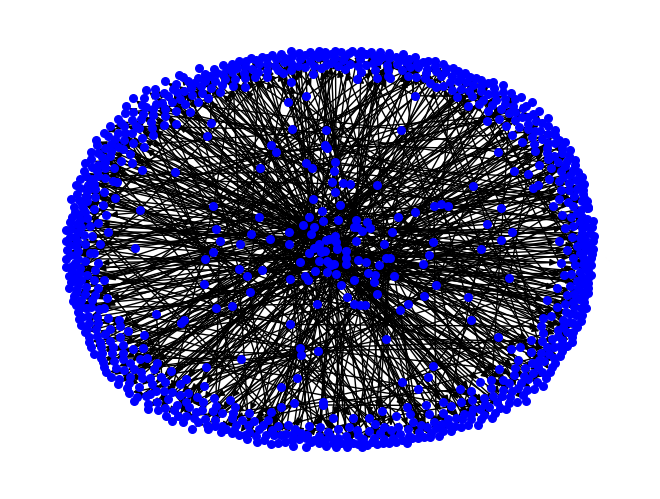

In [ ]:
v2 = g.vertices.filter("CAPITAL_SOCIAL > 500000000")
g2 = GraphFrame(v2, g.edges)

plot_graph(g2.edges)